In [2]:
cd ..

d:\research\fedmiss_bench


In [3]:
%load_ext autoreload
%autoreload
import pandas as pd
from FedImpute.loaders.load_data import load_data

In [139]:
from sklearn.decomposition import TruncatedSVD
embedding = TruncatedSVD(n_components=2)
X_transformed = embedding.fit_transform(X)
print(X_transformed.shape)

In [135]:
from sklearn.manifold import TSNE
embedding = TSNE(n_components=2, perplexity=50, random_state=42)
X_transformed = embedding.fit_transform(X)
print(X_transformed.shape)

In [133]:
from sklearn.manifold import SpectralEmbedding
embedding = SpectralEmbedding(n_components=2, random_state=42)
X_transformed = embedding.fit_transform(X)
print(X_transformed.shape)

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1], hue = y, palette='viridis')
plt.show()

In [163]:
import numpy as np
corr = pd.DataFrame(X).corr().abs()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=False, cmap='viridis')
plt.show()

In [197]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
# embedding = TruncatedSVD(n_components=2)
# X_transformed = embedding.fit_transform(X)
# print(X_transformed.shape)

pca = PCA(n_components=5, random_state=42)
X_transformed = pca.fit_transform(X)
print(X_transformed.shape)

corr_with_component = np.zeros((X_transformed.shape[1], X.shape[1]))
for components_id in range(X_transformed.shape[1]):
    corr_with_component[components_id, : ] = pd.DataFrame(X).corrwith(pd.Series(X_transformed[:, components_id])).values
fig, ax = plt.subplots()   
sns.heatmap(corr_with_component, annot=False, ax=ax)

plt.show()

In [201]:
na_inds = np.where(X_transformed[:, 4] > X_transformed[:, 4].mean())
na_inds

## MIWAE

In [113]:
from sklearn.datasets import make_gaussian_quantiles, make_hastie_10_2, make_blobs, make_classification
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X,y = make_classification(n_samples = 5000,  n_features=6, n_informative=2, n_redundant=1, random_state = 42)
X = StandardScaler().fit_transform(X)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X.shape, y.shape)

(5000, 6) (5000,)


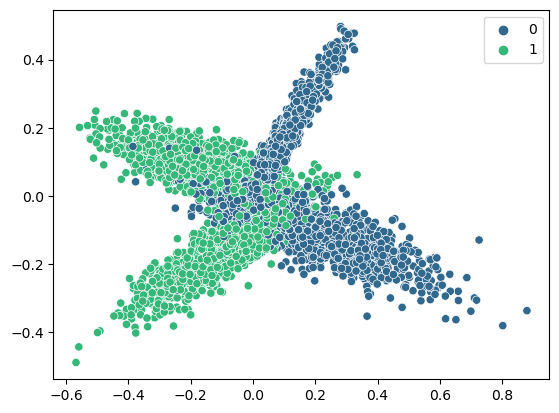

In [114]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

pca = PCA(n_components=2, random_state=42)
X_transformed = pca.fit_transform(X)

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1], hue = y, palette='viridis')
plt.show()

<Axes: >

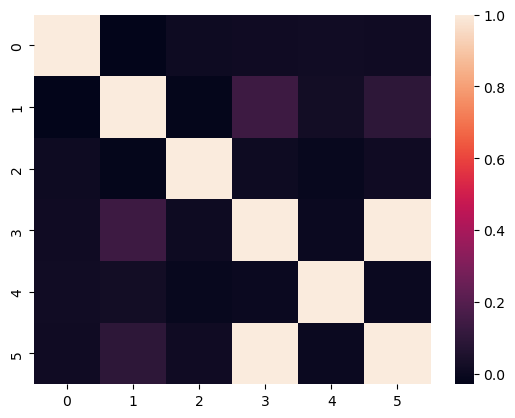

In [115]:
sns.heatmap(pd.DataFrame(X).corr())

In [90]:
X.shape

(1000, 6)

## MNAR Missing Data

(1000, 6) (1000, 6) (1000, 6)


<Axes: >

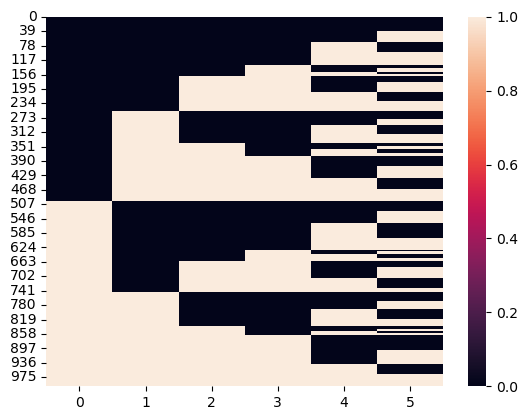

In [91]:
# generate missing data
import numpy as np

missing_ratio = 0.5
seed = 42
np.random.seed(seed)
indices = np.random.choice(range(X.shape[0]), 1000, replace=False)
X1 = X[indices].copy()
X_missing1 = X1.copy()
np.random.seed(42)
X_missing1[X_missing1[:, 0] < np.quantile(X_missing1[:, 0], 0.5), 0] = np.nan
X_missing1[X_missing1[:, 1] > np.quantile(X_missing1[:, 1], 0.5), 1] = np.nan
X_missing1[X_missing1[:, 2] < np.quantile(X_missing1[:, 2], 0.5), 2] = np.nan
X_missing1[X_missing1[:, 3] > np.quantile(X_missing1[:, 3], 0.5), 3] = np.nan
X_missing1[X_missing1[:, 4] < np.quantile(X_missing1[:, 4], 0.5), 4] = np.nan
X_missing1[X_missing1[:, 5] > np.quantile(X_missing1[:, 5], 0.5), 5] = np.nan
mask1 = np.isnan(X_missing1)

print(X1.shape, X_missing1.shape, mask1.shape)

# missing pattern
pattern = pd.DataFrame(mask1).astype(int).astype(str).apply(lambda x: ''.join(x), axis=1)
sorted_mask1 = pd.DataFrame(mask1).reindex(pattern.sort_values().index).values
mask1 = sorted_mask1
X1 = pd.DataFrame(X1).reindex(pattern.sort_values().index).values
X_missing1 = pd.DataFrame(X_missing1).reindex(pattern.sort_values().index).values
X_imp1 = X_missing1.copy()
X_imp1[mask1] = 0
sns.heatmap(mask1)

(1000, 6) (1000, 6) (1000, 6)


<Axes: >

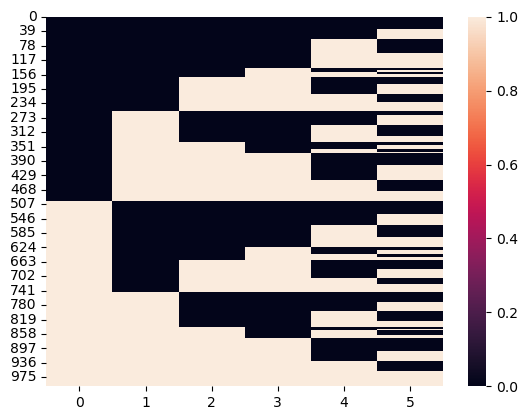

In [92]:
# generate missing data
import numpy as np

seed = 42
np.random.seed(seed)
indices = np.random.choice(range(X.shape[0]), 1000, replace=False)
X2 = X[indices].copy()
X_missing2 = X2.copy()
np.random.seed(42)
X_missing2[X_missing2[:, 0] > np.quantile(X_missing2[:, 0], 0.5), 0] = np.nan
X_missing2[X_missing2[:, 1] < np.quantile(X_missing2[:, 1], 0.5), 1] = np.nan
X_missing2[X_missing2[:, 2] > np.quantile(X_missing2[:, 2], 0.5), 2] = np.nan
X_missing2[X_missing2[:, 3] < np.quantile(X_missing2[:, 3], 0.5), 3] = np.nan
X_missing2[X_missing2[:, 4] > np.quantile(X_missing2[:, 4], 0.5), 4] = np.nan
X_missing2[X_missing2[:, 5] < np.quantile(X_missing2[:, 5], 0.5), 5] = np.nan
mask2 = np.isnan(X_missing2)
print(X2.shape, X_missing2.shape, mask2.shape)

# missing pattern
pattern = pd.DataFrame(mask2).astype(int).astype(str).apply(lambda x: ''.join(x), axis=1)

sorted_mask2 = pd.DataFrame(mask2).reindex(pattern.sort_values().index).values
mask2 = sorted_mask2
X2 = pd.DataFrame(X2).reindex(pattern.sort_values().index).values
X_missing2 = pd.DataFrame(X_missing2).reindex(pattern.sort_values().index).values
X_imp2 = X_missing2.copy()
X_imp2[mask2] = 0
sns.heatmap(mask2)

In [93]:
print(X1.shape, X_missing1.shape, mask1.shape, X_imp1.shape)
print(X2.shape, X_missing2.shape, mask2.shape, X_imp2.shape)

(1000, 6) (1000, 6) (1000, 6) (1000, 6)
(1000, 6) (1000, 6) (1000, 6) (1000, 6)


#### MIWAE

In [326]:
# stdlib
from typing import Any, List, Dict, Tuple

# third party
import numpy as np
import torch
from torch import nn, optim
import torch.distributions as td

# hyperimpute absolute
from emf.reproduce_utils import set_seed
from FedImpute.imputation.models.vae_models.decoder import GaussianDecoder, BernoulliDecoder, StudentTDecoder
from FedImpute.imputation.models.vae_models.encoder import BaseEncoder
from FedImpute.evaluation.imp_quality_metrics import rmse, sliced_ws

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def weights_init(layer: Any) -> None:
    if type(layer) == nn.Linear:
        torch.nn.init.orthogonal_(layer.weight)


class MIWAE(nn.Module):
    """MIWAE imputation plugin

    Args:
        n_epochs: int
            Number of training iterations
        batch_size: int
            Batch size
        latent_size: int
            dimension of the latent space
        n_hidden: int
            number of hidden units
        K: int
            number of IS during training
        random_state: int
            random seed

    Reference: "MIWAE: Deep Generative Modelling and Imputation of Incomplete Data", Pierre-Alexandre Mattei,
    Jes Frellsen
    Original code: https://github.com/pamattei/miwae
    """

    def __init__(
            self,
            num_features: int,
            latent_size: int = 1,
            n_hidden: int = 16,
            n_hidden_layers: int = 2,
            seed: int = 0,
            out_dist='studentt',
            K: int = 20,
            L: int = 1000,
    ) -> None:

        super().__init__()
        set_seed(seed)

        # parameters
        self.num_features = num_features
        self.n_hidden = n_hidden  # number of hidden units in (same for all MLPs)
        self.n_hidden_layers = n_hidden_layers  # number of hidden layers in (same for all MLPs)
        self.latent_size = latent_size  # dimension of the latent space
        self.K = K  # number of IS during training
        self.L = L  # number of samples for imputation

        # encoder
        self.encoder = BaseEncoder(
            self.num_features, self.latent_size, [self.n_hidden for _ in range(self.n_hidden_layers)],
        ).to(DEVICE)

        # decoder
        self.out_dist = out_dist
        if out_dist == 'studentt':
            self.decoder = StudentTDecoder(
                self.latent_size, self.num_features, [self.n_hidden for _ in range(self.n_hidden_layers)],
            )
        elif out_dist == 'gaussian':
            self.decoder = GaussianDecoder(
                self.latent_size, self.num_features, [self.n_hidden for _ in range(self.n_hidden_layers)],
            )
        elif out_dist == 'bernoulli':
            self.decoder = BernoulliDecoder(
                self.latent_size, self.num_features, [self.n_hidden for _ in range(self.n_hidden_layers)],
            )
        else:
            raise ValueError("Invalid output distribution")

        self.decoder = self.decoder.to(DEVICE)
        
        # mapping z to mask using hint
        self.mask_net = nn.Sequential(
            nn.Linear(self.latent_size, self.n_hidden),
            nn.ReLU(),
            nn.BatchNorm1d(self.n_hidden),
            nn.Linear(self.n_hidden, self.n_hidden),
            nn.ReLU(),
            nn.BatchNorm1d(self.n_hidden),
            nn.Linear(self.n_hidden, self.num_features),
            nn.Sigmoid()
        ).to(DEVICE)
        
        self.z_L = None
        self.mask_L = None

        # prior for z
        self.p_z = td.Independent(
            td.Normal(loc=torch.zeros(self.latent_size).to(DEVICE), scale=torch.ones(self.latent_size).to(DEVICE)), 1
        )

    @staticmethod
    def name() -> str:
        return "miwae"

    def init(self, seed):
        set_seed(seed)
        self.encoder.apply(weights_init)
        self.decoder.apply(weights_init)
        self.mask_net.apply(weights_init)

    def compute_loss(self, inputs: List[torch.Tensor]) -> Tuple[torch.Tensor, Dict]:
        x, mask = inputs  # x - data, mask - missing mask
        batch_size = x.shape[0]

        # encoder
        mu, logvar = self.encoder(x)

        q_zgivenxobs = td.Independent(td.Normal(loc=mu, scale=logvar), 1)
        zgivenx = q_zgivenxobs.rsample([self.K])  # shape (K, batch_size, latent_size)
        zgivenx_flat = zgivenx.reshape([self.K * batch_size, self.latent_size])
        
        self.z_L = zgivenx_flat

        # decoder
        out_decoder = self.decoder(zgivenx_flat)
        recon_x_means = self.decoder.l_out_mu(out_decoder)

        # compute loss
        data_flat = torch.Tensor.repeat(x, [self.K, 1]).reshape([-1, 1]).to(DEVICE)
        tiled_mask = torch.Tensor.repeat(mask, [self.K, 1]).to(DEVICE)
        self.mask_L = tiled_mask

        # p(x|z)
        all_log_pxgivenz_flat = self.decoder.dist_xgivenz(out_decoder, flat=True).log_prob(data_flat)
        all_log_pxgivenz = all_log_pxgivenz_flat.reshape([self.K * batch_size, self.num_features])
        logpxobsgivenz = torch.sum(all_log_pxgivenz * tiled_mask, 1).reshape([self.K, batch_size])

        # p(z) and q(z|x)
        logpz = self.p_z.log_prob(zgivenx)
        logq = q_zgivenxobs.log_prob(zgivenx)

        neg_bound = -torch.mean(torch.logsumexp(logpxobsgivenz + logpz - logq, 0))

        return neg_bound, {}
    
    def mask_prediction_loss(self, x, mask):
        
        with torch.no_grad():
            batch_size = x.shape[0]
            mu, logvar = self.encoder(x)
            q_zgivenxobs = td.Independent(td.Normal(loc=mu, scale=logvar), 1)
            zgivenx = q_zgivenxobs.rsample([self.K])  # shape (K, batch_size, latent_size)
            zgivenx_flat = zgivenx.reshape([self.K * batch_size, self.latent_size])
            z = zgivenx_flat
            tiled_mask = torch.Tensor.repeat(mask, [self.K, 1]).to(DEVICE)
            mask = tiled_mask.reshape([-1, self.num_features]).int()
            mask = mask.float()
            #z = torch.cat([z, mask], 1)
        
        mask_pred = self.mask_net(z)
        loss = torch.nn.BCELoss()(mask_pred, mask)  # predict missing prob -> 1
        
        return loss
    
    def mask_prediction(self, x: torch.Tensor, mask: torch.Tensor, K: int = 10):
        
        with torch.no_grad():
            mu, logvar = self.encoder(x)
            q_zgivenxobs = td.Independent(td.Normal(loc=mu, scale=logvar), 1)
            zgivenx = q_zgivenxobs.rsample([K])  # shape (K, batch_size, latent_size)
            zgivenx_flat = zgivenx.reshape([K * x.shape[0], self.latent_size])
            mask_L = torch.Tensor.repeat(mask, [K, 1])
            #zgivenx_flat = torch.cat([zgivenx_flat, mask_L.reshape([-1, self.num_features]).float()], 1)
            
            mask_pred = self.mask_net(zgivenx_flat)
            mask_pred = mask_pred.reshape([K, x.shape[0], self.num_features])
            
            return mask_pred

    def impute(self, x: torch.Tensor, mask: torch.Tensor) -> torch.Tensor:
        L = self.L
        batch_size = x.shape[0]
        p = x.shape[1]

        # encoder
        self.encoder.to(DEVICE)
        self.decoder.to(DEVICE)
        mu, logvar = self.encoder(x)
        q_zgivenxobs = td.Independent(td.Normal(loc=mu, scale=logvar), 1)

        zgivenx = q_zgivenxobs.rsample([L])
        zgivenx_flat = zgivenx.reshape([L * batch_size, self.latent_size])

        # decoder
        out_decoder = self.decoder(zgivenx_flat)
        recon_x_means = self.decoder.l_out_mu(out_decoder)

        # loss
        data_flat = torch.Tensor.repeat(x, [L, 1]).reshape([-1, 1]).to(DEVICE)
        tiledmask = torch.Tensor.repeat(mask, [L, 1]).to(DEVICE)

        all_log_pxgivenz_flat = self.decoder.dist_xgivenz(out_decoder, flat=True).log_prob(data_flat)
        all_log_pxgivenz = all_log_pxgivenz_flat.reshape([L * batch_size, p])

        logpxobsgivenz = torch.sum(all_log_pxgivenz * tiledmask, 1).reshape([L, batch_size])
        logpz = self.p_z.log_prob(zgivenx)
        logq = q_zgivenxobs.log_prob(zgivenx)

        # imputation weighted samples
        imp_weights = torch.nn.functional.softmax(
            logpxobsgivenz + logpz - logq, 0
        )  # these are w_1,....,w_L for all observations in the batch

        xgivenz = self.decoder.imp_dist_xgivenz(out_decoder)
        xms = xgivenz.sample().reshape([L, batch_size, p])
        xm = torch.einsum("ki,kij->ij", imp_weights, xms)

        # merge imputed values with observed values
        xhat = torch.clone(x)
        xhat[~mask.bool()] = xm[~mask.bool()]

        return xhat


In [15]:
from copy import deepcopy
from collections import OrderedDict
import torch
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

def train(model, X, mask, train_params, X_true, return_params = False):
    
    model.to(DEVICE)
    lr = train_params['lr']
    weight_decay = train_params['weight_decay']
    epochs = train_params['epochs']
    batch_size = train_params['batch_size']
    verbose = train_params['verbose']
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay, amsgrad=True)

    # data
    n = X.shape[0]
    X_imp = X.copy()
    X_mask = mask.copy()
    bs = min(batch_size, n)

    final_loss = 0
    rmses = []
    for ep in range(epochs):
        
        # evaluation
        with torch.no_grad():
            X_imp_new = model.impute(
                torch.from_numpy(X_imp).float().to(DEVICE), torch.from_numpy(~X_mask).float().to(DEVICE)
            )
            rmse_value = rmse(X_imp_new.detach().clone().cpu().numpy(), X_true, X_mask)
            rmses.append(rmse_value)

        # shuffle data
        perm = np.random.permutation(n)  # We use the "random reshuffling" version of SGD
        batches_data = np.array_split(X_imp[perm,], int(n / bs), )
        batches_mask = np.array_split(X_mask[perm,], int(n / bs), )
        total_loss, total_iters = 0, 0
        total_mask_loss = 0
        model.train()
        for it in range(len(batches_data)):
            optimizer.zero_grad()
            model.encoder.zero_grad()
            model.decoder.zero_grad()
            model.mask_net.zero_grad()
            b_data = torch.from_numpy(batches_data[it]).float().to(DEVICE)
            b_mask = torch.from_numpy(~batches_mask[it]).float().to(DEVICE)
            data = [b_data, b_mask]
            loss, ret_dict = model.compute_loss(data)

            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            total_iters += 1


        # print loss
        if (ep + 1) % verbose == 0:
            print('Epoch %s/%s, Loss = %s RMSE = %s' % (ep, epochs, total_loss / total_iters, rmses[-1]))

        if DEVICE == "cuda":
            torch.cuda.empty_cache()
        
        final_loss = total_loss / total_iters

    model.to("cpu")
    
    if return_params:
        return deepcopy(model.state_dict())
    else:
        return model

def impute(model, X, mask):
    model.to(DEVICE)
    X_imp = X.copy()
    X_mask = mask.copy()
    X_imp[mask] = 0
    X_imp = torch.from_numpy(X_imp).float().to(DEVICE)
    X_mask = torch.from_numpy(~X_mask).float().to(DEVICE)
    with torch.no_grad():
        X_imp_new = model.impute(X_imp, X_mask)
    model.to("cpu")
    return X_imp_new.detach().clone().cpu().numpy()

In [16]:
def train_mask_net(model, X, mask, train_params):
    
    model.to(DEVICE)
    lr = train_params['lr']
    weight_decay = train_params['weight_decay']
    epochs = train_params['epochs']
    batch_size = train_params['batch_size']
    verbose = train_params['verbose']
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay, amsgrad=True)

    # data
    n = X.shape[0]
    X_imp = X.copy()
    X_mask = mask.copy()
    bs = min(batch_size, n)

    final_loss = 0
    rmses = []
    for ep in range(epochs):

        # shuffle data
        perm = np.random.permutation(n)  # We use the "random reshuffling" version of SGD
        batches_data = np.array_split(X_imp[perm,], int(n / bs), )
        batches_mask = np.array_split(X_mask[perm,], int(n / bs), )
        total_loss, total_iters = 0, 0
        total_mask_loss = 0
        model.train()
        for it in range(len(batches_data)):
            optimizer.zero_grad()
            model.mask_net.zero_grad()
            b_data = torch.from_numpy(batches_data[it]).float().to(DEVICE)
            b_mask = torch.from_numpy(batches_mask[it]).float().to(DEVICE)
            loss = model.mask_prediction_loss(b_data, b_mask)

            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
            total_iters += 1


        # print loss
        if (ep + 1) % verbose == 0:
            print('Epoch %s/%s, Mask Loss = %s' % (ep, epochs, total_loss / total_iters))

        if DEVICE == "cuda":
            torch.cuda.empty_cache()
        
        final_loss = total_loss / total_iters

    model.to("cpu")
    
    return model

### Local Imputation

In [61]:
imp_model1 = MIWAE(
    num_features=X1.shape[1], latent_size = 3, n_hidden = 16, n_hidden_layers = 2, out_dist = 'gaussian', K = 20, L = 100
)
train_params = {
    'lr': 1e-3,
    'weight_decay': 1e-5,
    'epochs': 500,
    'batch_size': 64,
    'verbose': 10
}

imp_model1 = train(imp_model1, X_imp1, mask1, train_params, X1)
X_imp_new1 = impute(imp_model1, X_imp1, mask1)
print(X_imp_new1.shape)
print(rmse(X_imp_new1, X1, mask1))

Epoch 9/500, Loss = -6.568737014647453 RMSE = 0.24542122015801993
Epoch 19/500, Loss = -6.950117803389026 RMSE = 0.24228277423731318
Epoch 29/500, Loss = -7.137558014162125 RMSE = 0.24551275849321016
Epoch 39/500, Loss = -7.224433437470467 RMSE = 0.24136617646112493
Epoch 49/500, Loss = -7.236622056653423 RMSE = 0.24254530716764686
Epoch 59/500, Loss = -7.226444936567737 RMSE = 0.2449426688639124
Epoch 69/500, Loss = -7.264382423893098 RMSE = 0.2468009935516216
Epoch 79/500, Loss = -7.31275910715903 RMSE = 0.24403288988645783
Epoch 89/500, Loss = -7.317948341369629 RMSE = 0.24732442437548421
Epoch 99/500, Loss = -7.276480397870464 RMSE = 0.2501369011744936
Epoch 109/500, Loss = -7.344153450381372 RMSE = 0.2522158926322214
Epoch 119/500, Loss = -7.307052335431499 RMSE = 0.24869734419688977
Epoch 129/500, Loss = -7.302510476881458 RMSE = 0.24384302222062518
Epoch 139/500, Loss = -7.367354069986651 RMSE = 0.25154257016567333
Epoch 149/500, Loss = -7.38689725629745 RMSE = 0.245320601571080

In [62]:
imp_model2 = MIWAE(
    num_features=X2.shape[1], latent_size = 3, n_hidden = 16, n_hidden_layers = 2, out_dist = 'gaussian', K = 20, L = 100
)
train_params = {
    'lr': 1e-3,
    'weight_decay': 1e-5,
    'epochs': 500,
    'batch_size': 64,
    'verbose': 10
}

imp_model2 = train(imp_model2, X_imp2, mask2, train_params, X2)

X_imp_new2 = impute(imp_model2, X_imp2, mask2)
print(X_imp_new2.shape)
print(rmse(X_imp_new2, X2, mask2))

Epoch 9/500, Loss = -6.524941705888318 RMSE = 0.25454339381244956
Epoch 19/500, Loss = -6.993252400429018 RMSE = 0.24849024848392195
Epoch 29/500, Loss = -7.160204041388727 RMSE = 0.2563273929400268
Epoch 39/500, Loss = -7.15518836052187 RMSE = 0.24724196429764012
Epoch 49/500, Loss = -7.1435913424338064 RMSE = 0.2583168335299013
Epoch 59/500, Loss = -7.254160096568446 RMSE = 0.2501396561132316
Epoch 69/500, Loss = -7.298284392203054 RMSE = 0.2573709607654094
Epoch 79/500, Loss = -7.2569814035969396 RMSE = 0.25436107666631114
Epoch 89/500, Loss = -7.2250205316851215 RMSE = 0.26170143540206053
Epoch 99/500, Loss = -7.271214239058956 RMSE = 0.24676036131680132
Epoch 109/500, Loss = -7.267533471507411 RMSE = 0.2588371854269595
Epoch 119/500, Loss = -7.314957572567847 RMSE = 0.2524935948223758
Epoch 129/500, Loss = -7.273745075348885 RMSE = 0.2520414170979565
Epoch 139/500, Loss = -7.262460077962568 RMSE = 0.25602562379501176
Epoch 149/500, Loss = -7.228302448026596 RMSE = 0.24669888711028

### Cross Imputation

In [63]:
X_imp_new1 = impute(imp_model2, X_imp1, mask1)
print(X_imp_new1.shape)
print(rmse(X_imp_new1, X1, mask1))

X_imp_new2 = impute(imp_model1, X_imp2, mask2)
print(X_imp_new2.shape)
print(rmse(X_imp_new2, X2, mask2))

(2000, 6)
0.11384345151876026
(2000, 6)
0.10879792771143217


### Fedavg with POC

In [96]:
def fedavg(local_model_parameters):
    # federated averaging implementation
    averaged_model_state_dict = OrderedDict()  # global parameters
    #sample_sizes = [item['sample_size'] for item in fit_res]

    for it, local_model_state_dict in enumerate(local_model_parameters):
        for key in local_model_state_dict.keys():
            if it == 0:
                averaged_model_state_dict[key] = (1/len(local_model_parameters))*local_model_state_dict[key]
            else:
                averaged_model_state_dict[key] += (1/len(local_model_parameters))*local_model_state_dict[key]

    # copy parameters for each client
    agg_model_parameters = [deepcopy(averaged_model_state_dict) for _ in range(len(local_model_parameters))]
    agg_res = {}

    return agg_model_parameters, agg_res

imp_model_global = MIWAE(
    num_features=X.shape[1], latent_size = 3, n_hidden = 16, n_hidden_layers = 2, out_dist = 'gaussian', K = 20, L = 100
)

imp_model1 = MIWAE(
    num_features=X1.shape[1], latent_size = 3, n_hidden = 16, n_hidden_layers = 2, out_dist = 'gaussian', K = 20, L = 100
)

imp_model2 = MIWAE(
    num_features=X2.shape[1], latent_size = 3, n_hidden = 16, n_hidden_layers = 2, out_dist = 'gaussian', K = 20, L = 100
)

imp_model1.load_state_dict(deepcopy(imp_model_global.state_dict()))
imp_model2.load_state_dict(deepcopy(imp_model_global.state_dict()))

global_iteration = 100

train_params = {
    'lr': 1e-3,
    'weight_decay': 1e-5,
    'epochs': 5,
    'batch_size': 64,
    'verbose': 10
}

for it in range(global_iteration):
    print(f"Global iteration {it}")
    # global model training
    params = imp_model_global.state_dict()
    params1 = train(imp_model_global, X_imp1, mask1, train_params, X1, return_params=True)
    imp_model_global.load_state_dict(deepcopy(params))
    params2 = train(imp_model_global, X_imp2, mask2, train_params, X2, return_params=True)
    
    # local model training
    imp_model1 = train(imp_model1, X_imp1, mask1, train_params, X1)
    imp_model2 = train(imp_model2, X_imp2, mask2, train_params, X2)
    
    # federated averaging
    avg_params, _ = fedavg([params1, params2])
    imp_model_global.load_state_dict(avg_params[0])
    
    # update local model encoder
    imp_model1.encoder.load_state_dict(imp_model_global.encoder.state_dict(), strict = False)
    imp_model2.encoder.load_state_dict(imp_model_global.encoder.state_dict(), strict = False)
    
    X_imp_g1 = impute(imp_model_global, X_imp1, mask1)
    X_imp_l1 = impute(imp_model1, X_imp1, mask1)
    X_imp_g2 = impute(imp_model_global, X_imp2, mask2)
    X_imp_l2 = impute(imp_model2, X_imp2, mask2)
    print(rmse(X_imp_g1, X1, mask1), rmse(X_imp_g2, X2, mask2))
    print(rmse(X_imp_l1, X1, mask1), rmse(X_imp_l2, X2, mask2))

Global iteration 0
0.18409505363696554 0.14323505072062223
0.27296529236961525 0.2574065073927391
Global iteration 1
0.174029345208838 0.16125528521941604
0.26801110684384954 0.25737185946648455
Global iteration 2
0.17211171404029157 0.1647512277876982
0.2767731844389923 0.26794761879296497
Global iteration 3
0.17129724917659095 0.16456148020315597
0.2759552842053154 0.26812893645214964
Global iteration 4
0.17303488652005838 0.16126351485655346
0.26747320863077356 0.26866650785012874
Global iteration 5
0.17000707060876374 0.1699201771552838
0.2723371463756963 0.26695405748113554
Global iteration 6
0.1710565667386898 0.16947794575746486
0.2697069292996746 0.2648347025361427
Global iteration 7
0.17415352889408808 0.1697204199088775
0.2667361877380613 0.26888496437488346
Global iteration 8
0.1707792122248117 0.1723570222723261
0.2693665900037225 0.26520655440772545
Global iteration 9
0.17660334048110485 0.1710547677767175
0.27410136993818435 0.26544260487995547
Global iteration 10
0.17520

In [97]:
train_params = {
    'lr': 1e-3,
    'weight_decay': 1e-5,
    'epochs': 60,
    'batch_size': 64,
    'verbose': 10
}

imp_model1 = train_mask_net(imp_model1, X_imp1, mask1, train_params)
imp_model2 = train_mask_net(imp_model2, X_imp2, mask2, train_params)

Epoch 9/60, Mask Loss = 0.6867735544840495
Epoch 19/60, Mask Loss = 0.6853961229324341
Epoch 29/60, Mask Loss = 0.6855425238609314
Epoch 39/60, Mask Loss = 0.685110624631246
Epoch 49/60, Mask Loss = 0.6841957529385885
Epoch 59/60, Mask Loss = 0.6848595778147379
Epoch 9/60, Mask Loss = 0.6832783937454223
Epoch 19/60, Mask Loss = 0.6802330414454142
Epoch 29/60, Mask Loss = 0.679205060005188
Epoch 39/60, Mask Loss = 0.6790572126706441
Epoch 49/60, Mask Loss = 0.680075220266978
Epoch 59/60, Mask Loss = 0.680045469601949


In [17]:
import torch.distributions as td

def new_impute(global_model, local_model, x: torch.Tensor, mask: torch.Tensor, L) -> torch.Tensor:
    
    with torch.no_grad():
        x = x.to(DEVICE)
        mask = ~mask.to(DEVICE)
        batch_size = x.shape[0]
        p = x.shape[1]
        
        # encoder
        global_model.encoder.to(DEVICE)
        global_model.decoder.to(DEVICE)
        local_model.encoder.to(DEVICE)
        local_model.decoder.to(DEVICE)
        local_model.mask_net.to(DEVICE)
        mu, logvar = local_model.encoder(x)
        
        q_zgivenxobs = td.Independent(td.Normal(loc=mu, scale=logvar), 1)
        zgivenx = q_zgivenxobs.rsample([L])
        zgivenx_flat = zgivenx.reshape([L * batch_size, local_model.latent_size])
    
        # decoder
        global_out_decoder = global_model.decoder(zgivenx_flat)
        local_out_decoder = local_model.decoder(zgivenx_flat)
        #recon_x_means = self.decoder.l_out_mu(out_decoder)
    
        # loss
        data_flat = torch.Tensor.repeat(x, [L, 1]).reshape([-1, 1]).to(DEVICE)
        tiledmask = torch.Tensor.repeat(mask, [L, 1]).to(DEVICE)
    
        all_log_pxgivenz_flat_local = local_model.decoder.dist_xgivenz(local_out_decoder, flat=True).log_prob(data_flat)
        all_log_pxgivenz_local = all_log_pxgivenz_flat_local.reshape([L * batch_size, p])
        logpxobsgivenz = torch.sum(all_log_pxgivenz_local * tiledmask, 1).reshape([L, batch_size])
        
        all_log_pxgivenz_flat_global = global_model.decoder.dist_xgivenz(global_out_decoder, flat=True).log_prob(data_flat)
        all_log_pxgivenz_global = all_log_pxgivenz_flat_global.reshape([L * batch_size, p])
        logpxobsgivenz_global = torch.sum(all_log_pxgivenz_global * tiledmask, 1).reshape([L, batch_size])
        
        #print(all_log_pxgivenz_global.exp(), all_log_pxgivenz_local.exp())
        
        logpz = local_model.p_z.log_prob(zgivenx)
        logq = q_zgivenxobs.log_prob(zgivenx)
        
        logpz_global = global_model.p_z.log_prob(zgivenx)
        logq_global = q_zgivenxobs.log_prob(zgivenx)
            
        # imputation weighted samples
        imp_weights_local = torch.nn.functional.softmax(
            logpxobsgivenz + logpz - logq, 0
        )  # these are w_1,....,w_L for all observations in the batch
        imp_weights_global = torch.nn.functional.softmax(
            logpxobsgivenz_global + logpz_global - logq_global, 0
        )
    
        xgivenz_local = local_model.decoder.imp_dist_xgivenz(local_out_decoder)
        xgivenz_global = global_model.decoder.imp_dist_xgivenz(global_out_decoder)
        xms_local = xgivenz_local.sample().reshape([L, batch_size, p])
        xms_global = xgivenz_global.sample().reshape([L, batch_size, p])
        
        mask_prob = local_model.mask_net(zgivenx_flat)
        mask_prob = mask_prob.reshape([L, batch_size, p]) + 0.01  # avoid zero
        
        xm_local = torch.einsum("ki,kij->ij", imp_weights_local, (1 - 1/mask_prob)*xms_local)
        xm_global = torch.einsum("ki,kij->ij", imp_weights_local, 1/mask_prob*xms_global)
        
        xm = xm_global + xm_local
    
        # merge imputed values with observed values
        xhat = torch.clone(x)
        xhat[~mask.bool()] = xm[~mask.bool()]
    
        return xhat.detach().clone().cpu().numpy()

In [98]:
X_imp_new1 = new_impute(imp_model_global, imp_model1, torch.from_numpy(X_imp1).float(), torch.from_numpy(mask1), 1000)
print(rmse(X_imp_new1, X1, mask1))

X_imp_new2 = new_impute(imp_model_global, imp_model2, torch.from_numpy(X_imp2).float(), torch.from_numpy(mask2), 1000)
print(rmse(X_imp_new2, X2, mask2))

0.10246562129602882
0.0907575466706131


In [86]:
X_imp_new1 = new_impute(imp_model_global, imp_model1, torch.from_numpy(X_imp1[-4:,:]).float(), torch.from_numpy(mask1[-4:,:]), 5)
X_imp_g1 = impute(imp_model_global, X_imp1[-4:,:], mask1[-4:,:])
X_imp_l1 = impute(imp_model1, X_imp1[-4:,:], mask1[-4:,:])

## MNAR + MCAR

In [327]:
from FedImpute.loaders.load_data import load_data
import seaborn as sns

In [328]:
codrna, config = load_data('codrna')

m:\miniconda3\envs\fed_imp2\lib\site-packages\dython\nominal.py:298: RuntimeWarning: Rounded eta = 1.0000000000000002 to 1. This is probably due to floating point precision issues.
  warnings.warn(


<Axes: >

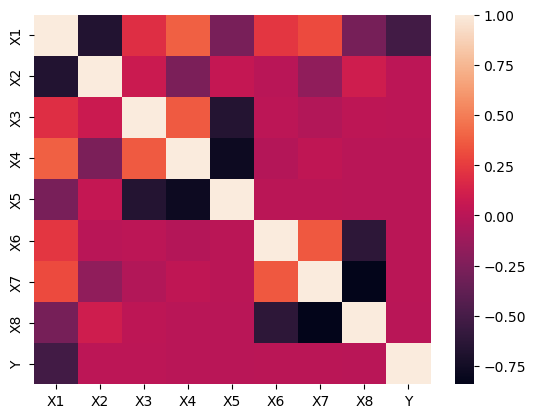

In [262]:
california, config = load_data('california')

sns.heatmap(pd.DataFrame(codrna).corr())

<Axes: >

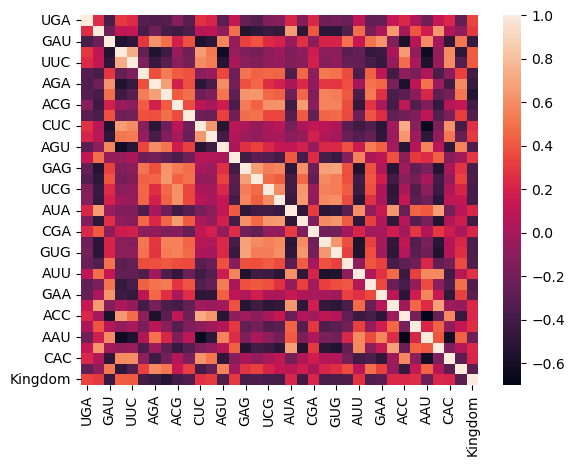

In [331]:
codon, config = load_data('codon')

sns.heatmap(pd.DataFrame(codon).corr())

(5000, 6) (5000,)


<Axes: >

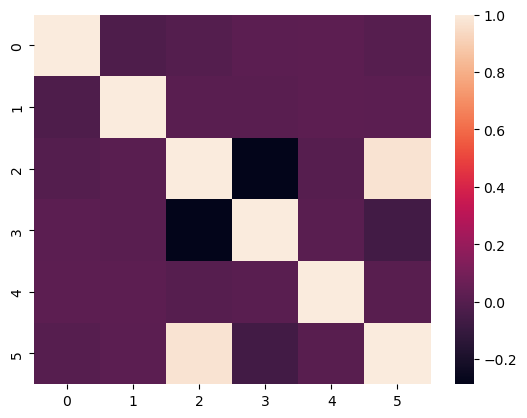

In [254]:
from sklearn.datasets import make_gaussian_quantiles, make_hastie_10_2, make_blobs, make_classification
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X,y = make_classification(n_samples = 5000,  n_features=6, n_informative=2, n_redundant=1, random_state = 50)
X = StandardScaler().fit_transform(X)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X.shape, y.shape)
sns.heatmap(pd.DataFrame(X).corr())

In [340]:
X = codon.values[:, :-1]
X = StandardScaler().fit_transform(X)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X.shape)

(13008, 34)


(2000, 34) (2000, 34) (2000, 34)


<Axes: >

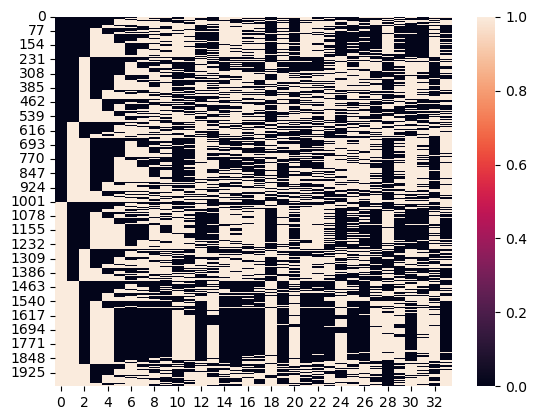

In [358]:
# generate missing data
import numpy as np

missing_ratio = 0.5
seed = 42
np.random.seed(seed)
indices = np.random.choice(range(X.shape[0]), 2000, replace=False)
X1 = X[indices].copy()
X_missing1 = X1.copy()

np.random.seed(50)
for col_idx in range(X1.shape[1]):
    direction = np.random.choice([1])
    if direction == 1:
        X_missing1[X_missing1[:, col_idx] > np.quantile(X_missing1[:, col_idx], 0.5), col_idx] = np.nan
    else:
        X_missing1[X_missing1[:, col_idx] < np.quantile(X_missing1[:, col_idx], 0.5), col_idx] = np.nan
# X_missing1[X_missing1[:, 0] > np.quantile(X_missing1[:, 0], 0.5), 0] = np.nan
# X_missing1[X_missing1[:, 1] < np.quantile(X_missing1[:, 1], 0.5), 1] = np.nan
# X_missing1[X_missing1[:, 2] > np.quantile(X_missing1[:, 2], 0.5), 2] = np.nan
# X_missing1[X_missing1[:, 3] < np.quantile(X_missing1[:, 3], 0.5), 3] = np.nan
# X_missing1[X_missing1[:, 4] > np.quantile(X_missing1[:, 4], 0.5), 4] = np.nan
# X_missing1[X_missing1[:, 5] < np.quantile(X_missing1[:, 5], 0.5), 5] = np.nan
# X_missing1[X_missing1[:, 6] > np.quantile(X_missing1[:, 6], 0.5), 6] = np.nan
# X_missing1[X_missing1[:, 7] < np.quantile(X_missing1[:, 7], 0.5), 7] = np.nan
mask1 = np.isnan(X_missing1)

print(X1.shape, X_missing1.shape, mask1.shape)

# missing pattern
pattern = pd.DataFrame(mask1).astype(int).astype(str).apply(lambda x: ''.join(x), axis=1)
sorted_mask1 = pd.DataFrame(mask1).reindex(pattern.sort_values().index).values
mask1 = sorted_mask1
X1 = pd.DataFrame(X1).reindex(pattern.sort_values().index).values
X_missing1 = pd.DataFrame(X_missing1).reindex(pattern.sort_values().index).values
X_imp1 = X_missing1.copy()
X_imp1[mask1] = 0
sns.heatmap(mask1)

(2000, 34) (2000, 34) (2000, 34)


<Axes: >

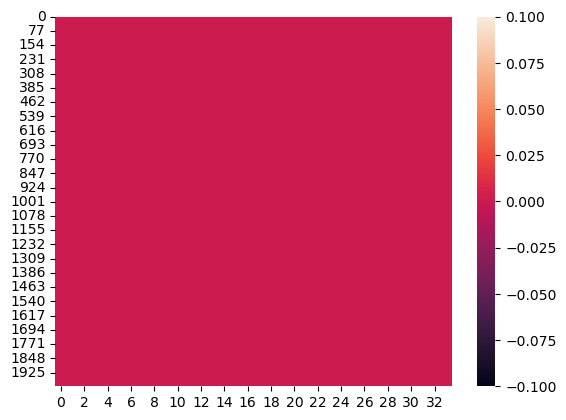

In [359]:
# generate missing data
import numpy as np

seed = 42
np.random.seed(seed)
indices = np.random.choice(range(X.shape[0]), 2000, replace=False)
X2 = X[indices].copy()
X_missing2 = X2.copy()
np.random.seed(42)
# for col_idx in range(X_missing2.shape[1]):
#     seed = 43 + col_idx
#     np.random.seed(seed)
#     missing_indices = np.random.choice(range(X_missing2.shape[0]), 1000, replace=False)
#     X_missing2[missing_indices, col_idx] = np.nan
# X_missing2[X_missing2[:, 0] > np.quantile(X_missing2[:, 0], 0.5), 0] = np.nan
# X_missing2[X_missing2[:, 1] < np.quantile(X_missing2[:, 1], 0.5), 1] = np.nan
# X_missing2[X_missing2[:, 2] > np.quantile(X_missing2[:, 2], 0.5), 2] = np.nan
# X_missing2[X_missing2[:, 3] < np.quantile(X_missing2[:, 3], 0.5), 3] = np.nan
# X_missing2[X_missing2[:, 4] > np.quantile(X_missing2[:, 4], 0.5), 4] = np.nan
# X_missing2[X_missing2[:, 5] < np.quantile(X_missing2[:, 5], 0.5), 5] = np.nan
mask2 = np.isnan(X_missing2)
print(X2.shape, X_missing2.shape, mask2.shape)

# missing pattern
pattern = pd.DataFrame(mask2).astype(int).astype(str).apply(lambda x: ''.join(x), axis=1)

sorted_mask2 = pd.DataFrame(mask2).reindex(pattern.sort_values().index).values
mask2 = sorted_mask2
X2 = pd.DataFrame(X2).reindex(pattern.sort_values().index).values
X_missing2 = pd.DataFrame(X_missing2).reindex(pattern.sort_values().index).values
X_imp2 = X_missing2.copy()
X_imp2[mask2] = 0
sns.heatmap(mask2)

In [360]:
%env CUBLAS_WORKSPACE_CONFIG :4096:8

env: CUBLAS_WORKSPACE_CONFIG=:4096:8


In [361]:
def fedavg(local_model_parameters):
    # federated averaging implementation
    averaged_model_state_dict = OrderedDict()  # global parameters
    #sample_sizes = [item['sample_size'] for item in fit_res]

    for it, local_model_state_dict in enumerate(local_model_parameters):
        for key in local_model_state_dict.keys():
            if it == 0:
                averaged_model_state_dict[key] = (1/len(local_model_parameters))*local_model_state_dict[key]
            else:
                averaged_model_state_dict[key] += (1/len(local_model_parameters))*local_model_state_dict[key]

    # copy parameters for each client
    agg_model_parameters = [deepcopy(averaged_model_state_dict) for _ in range(len(local_model_parameters))]
    agg_res = {}

    return agg_model_parameters, agg_res

imp_model_global = MIWAE(
    num_features=X.shape[1], latent_size = 20, n_hidden = 64, n_hidden_layers = 2, out_dist = 'gaussian', K = 20, L = 100
)

imp_model1 = MIWAE(
    num_features=X1.shape[1], latent_size = 20, n_hidden = 64, n_hidden_layers = 2, out_dist = 'gaussian', K = 20, L = 100
)

# imp_model2 = MIWAE(
#     num_features=X2.shape[1], latent_size = 3, n_hidden = 32, n_hidden_layers = 2, out_dist = 'gaussian', K = 20, L = 100
# )

imp_model1.load_state_dict(deepcopy(imp_model_global.state_dict()))
# imp_model2.load_state_dict(deepcopy(imp_model_global.state_dict()))

global_iteration = 100

train_params = {
    'lr': 1e-3,
    'weight_decay': 0,
    'epochs': 5,
    'batch_size': 64,
    'verbose': 10
}

for it in range(global_iteration):
    print(f"Global iteration {it}")
    # global model training
    # params = imp_model_global.state_dict()
    # params1 = train(imp_model_global, X_imp1, mask1, train_params, X1, return_params=True)
    # imp_model_global.load_state_dict(deepcopy(params))
    imp_model1 = train(imp_model1, X_imp1, mask1, train_params, X1)
    params2 = train(imp_model_global, X_imp2, mask2, train_params, X2, return_params=True)
    
    # local model training
    # imp_model1 = train(imp_model1, X_imp1, mask1, train_params, X1)
    # imp_model2 = train(imp_model2, X_imp2, mask2, train_params, X2)
    
    # federated averaging
    #avg_params, _ = fedavg([params1, params2])
    #imp_model_global.load_state_dict(avg_params[0])
    
    # update local model encoder
    # imp_model1.encoder.load_state_dict(deepcopy(imp_model_global.encoder.state_dict()), strict = False)
    # imp_model2.encoder.load_state_dict(imp_model_global.encoder.state_dict(), strict = False)
    # imp_model_global.encoder.load_state_dict(deepcopy(imp_model1.encoder.state_dict()), strict = False)
        
    X_imp_g1 = impute(imp_model_global, X_imp1, mask1)
    X_imp_l1 = impute(imp_model1, X_imp1, mask1)
    #X_imp_g2 = impute(imp_model_global, X_imp2, mask2)
    #X_imp_l2 = impute(imp_model2, X_imp2, mask2)
    print(rmse(X_imp_g1, X1, mask1), rmse(X_imp_l1, X1, mask1))
    #print(rmse(X_imp_l1, X1, mask1), rmse(X_imp_l2, X2, mask2))

Global iteration 0
0.18289846388173767 0.1857114960531306
Global iteration 1
0.22050121249455795 0.18219966945698318
Global iteration 2
0.24273919216743467 0.17859147024839991
Global iteration 3
0.24856998360005939 0.17802948871120583
Global iteration 4
0.25338415560269334 0.180057130599783
Global iteration 5
0.24686853022516558 0.17839646098986117
Global iteration 6
0.2486007732599222 0.17657260453950774
Global iteration 7
0.24413859967295595 0.17907501314603738
Global iteration 8
0.23943477563632723 0.17737312098427374
Global iteration 9
0.24458554262946547 0.17841028473640944
Global iteration 10
0.24032332109939986 0.17834656340498123
Global iteration 11
0.2347968227708149 0.17528587991278735
Global iteration 12
0.234711422611197 0.17480431329627688
Global iteration 13
0.23227318002735878 0.17374116638506476
Global iteration 14
0.233724140563804 0.17596375298837783
Global iteration 15
0.23035015844157247 0.17402855501246856
Global iteration 16
0.22831337644615268 0.17237712589562532

In [362]:
train_params = {
    'lr': 1e-3,
    'weight_decay': 0,
    'epochs': 100,
    'batch_size': 64,
    'verbose': 10
}

imp_model1 = train_mask_net(imp_model1, X_imp1, mask1, train_params)
#imp_model2 = train_mask_net(imp_model2, X_imp2, mask2, train_params)

Epoch 9/100, Mask Loss = 0.6232880180881869
Epoch 19/100, Mask Loss = 0.621339084640626
Epoch 29/100, Mask Loss = 0.62121799876613
Epoch 39/100, Mask Loss = 0.6215769167869322
Epoch 49/100, Mask Loss = 0.621160295701796
Epoch 59/100, Mask Loss = 0.6201549729993266
Epoch 69/100, Mask Loss = 0.6194731285495143
Epoch 79/100, Mask Loss = 0.6200291437487448
Epoch 89/100, Mask Loss = 0.6206098775709828
Epoch 99/100, Mask Loss = 0.62015498645844


In [363]:
X_imp_new1 = new_impute(imp_model_global, imp_model1, torch.from_numpy(X_imp1).float(), torch.from_numpy(mask1), 1000)
print(rmse(X_imp_new1, X1, mask1))

0.13109431737288924
